In [1]:
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [36]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\samundra\AppData\Local\Temp\ipykernel_3856\1656217457.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde = False,bins = 20)


<Axes: xlabel='total_bill'>

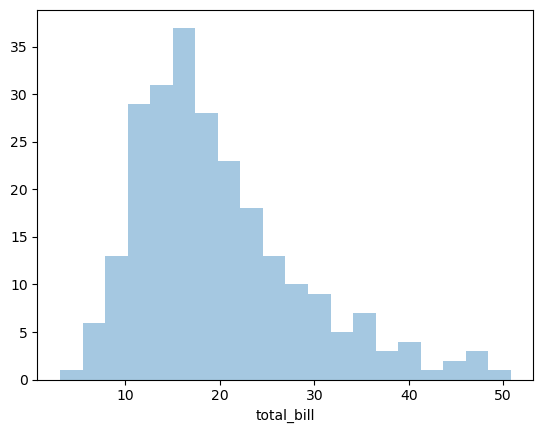

In [11]:
sns.distplot(tips['total_bill'],kde = False,bins = 20)

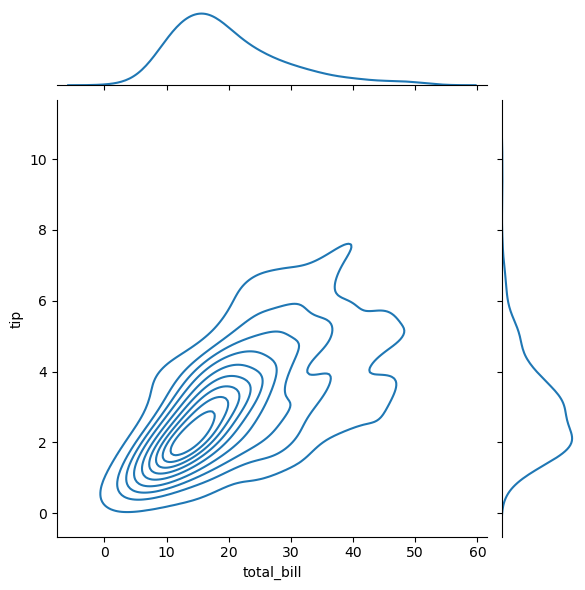

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')
#kde = kernal density estimate

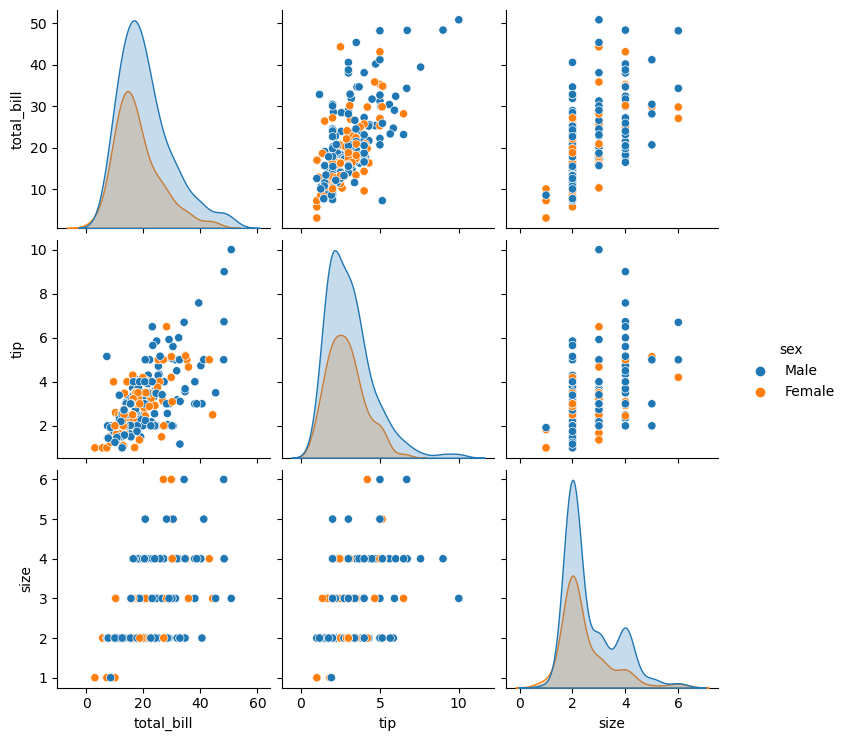

In [19]:
sns.pairplot(tips,hue='sex')

<Axes: xlabel='total_bill'>

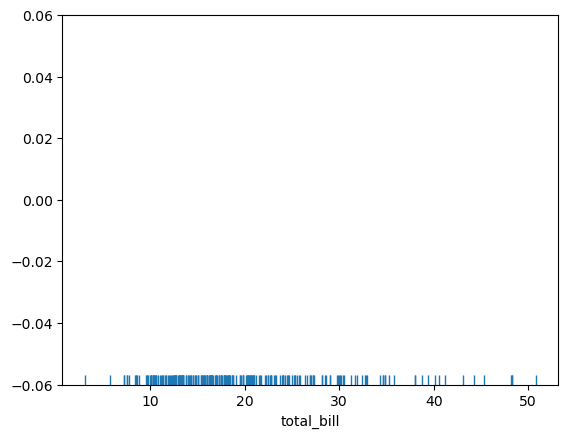

In [20]:
sns.rugplot(tips['total_bill'])

__Categorical plots__

In [3]:
cars = sns.load_dataset('mpg').dropna()

cars = cars[cars.cylinders.isin([4,6,8])]

cars['type'] = ['old' if x<= 76 else 'new' for x in cars.model_year]

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,old
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,old
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,old
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,old
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,old


In [6]:
cars.shape

(385, 10)

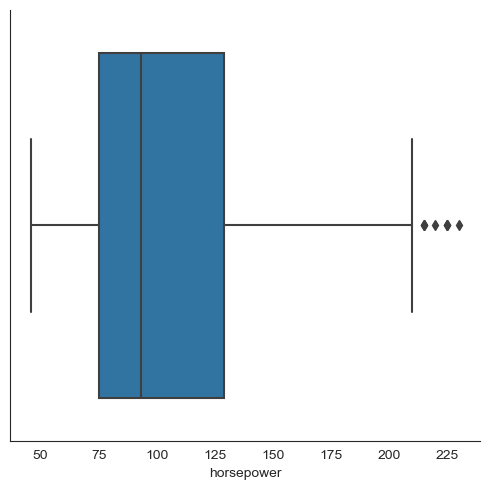

In [11]:
sns.set_style('white')

#kind = 'violin'

sns.catplot(x='horsepower', data = cars, kind = 'box');

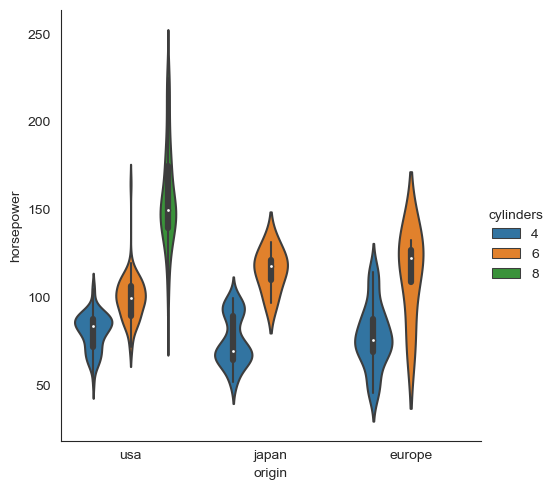

In [18]:
#cat var:hue

sns.catplot(x = 'origin', y = 'horsepower', data = cars, kind = 'violin'
           ,hue='cylinders')

__multiples(FACETGRID)__

In [19]:
sns.set_style('darkgrid')

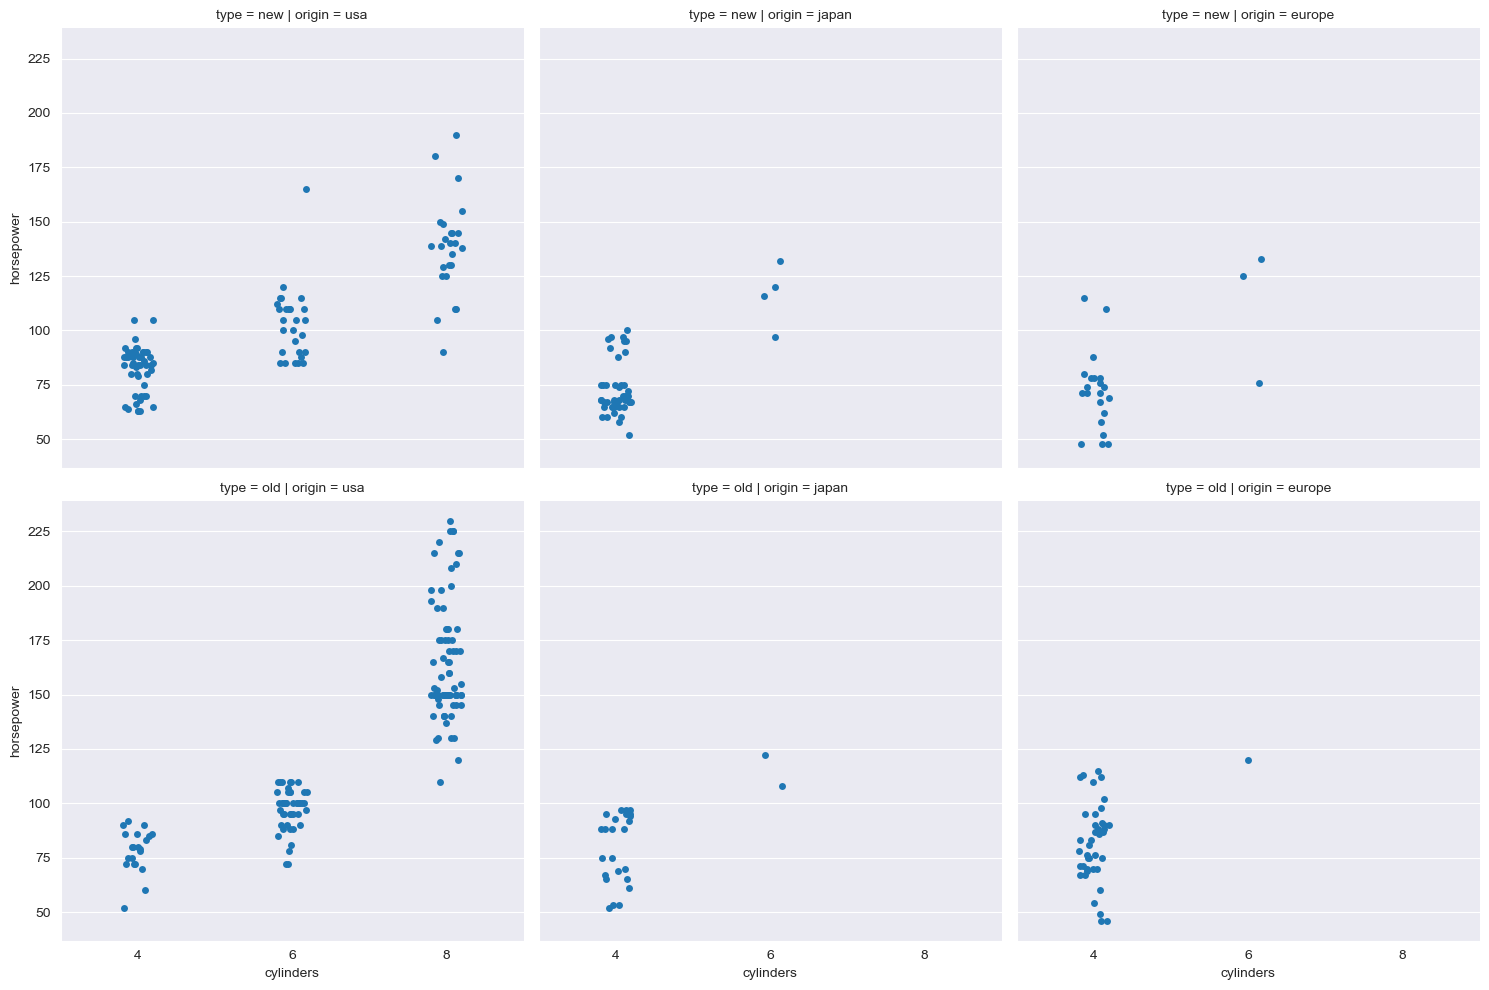

In [24]:
sns.catplot(x = 'cylinders', y = 'horsepower',
           data = cars, kind = 'strip', col = 'origin', row = 'type'
           ,row_order=['new','old']);

__styling__

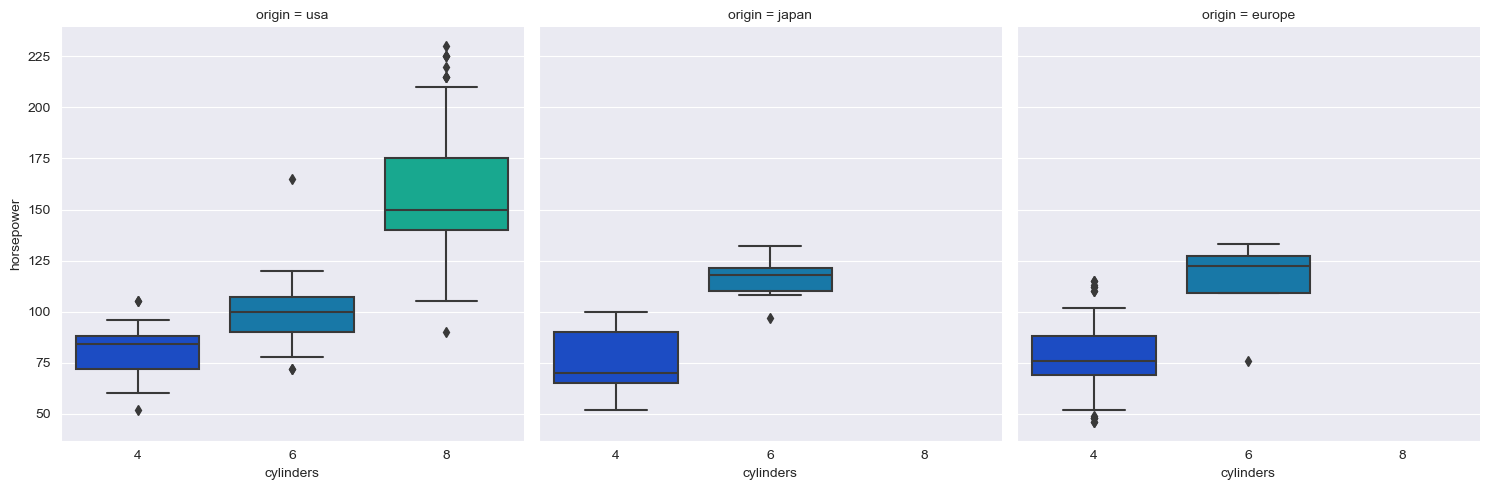

In [26]:
sns.catplot(x = 'cylinders', y = 'horsepower',
           data = cars,
            kind = 'box', 
            col='origin',
           palette='winter', whis = 1)

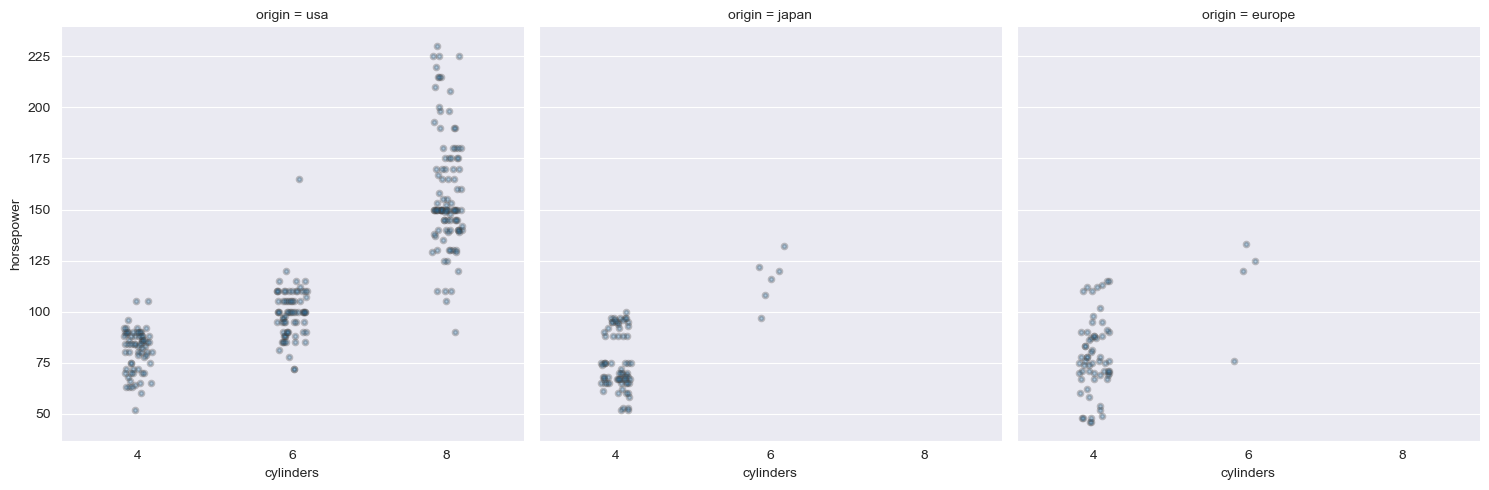

In [28]:
sns.catplot(x = 'cylinders', y = 'horsepower',
           data = cars,
            kind = 'strip', 
            col='origin',
            s = 12,
            alpha = 0.3,
            linewidth = 2
            )

seaborn.axisgrid.FacetGrid

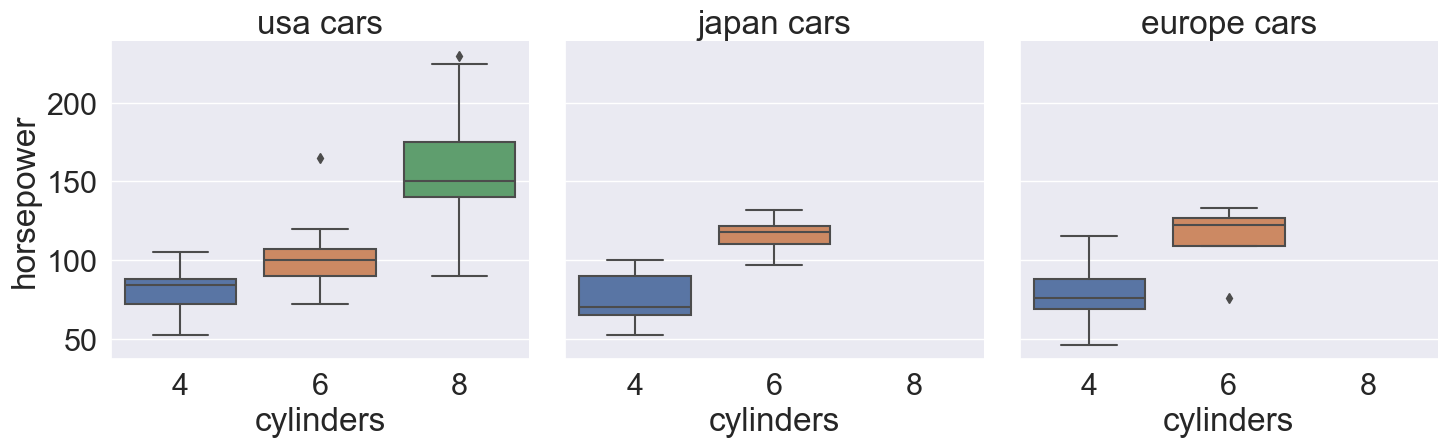

In [34]:
sns.set(style='darkgrid', font_scale=2)
g = sns.catplot(x = 'cylinders', y = 'horsepower',
           data = cars,
            kind = 'box', 
            col='origin',
           )
g.set_titles(col_template = "{col_name} cars");
type(g)

__Matrix plot__

In [35]:
flights = sns.load_dataset('flights')

In [37]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
#HEATMAP

In [40]:
tips.corr()

C:\Users\samundra\AppData\Local\Temp\ipykernel_14804\3825555837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\samundra\AppData\Local\Temp\ipykernel_14804\1579789445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr())


<Axes: >

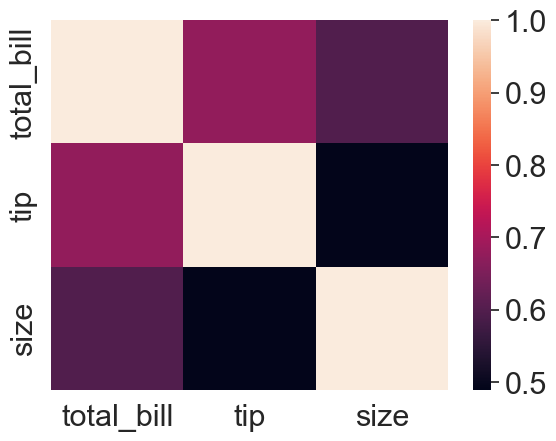

In [41]:
sns.heatmap(tips.corr())

C:\Users\samundra\AppData\Local\Temp\ipykernel_14804\963287938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr(),cmap = 'coolwarm',annot = True)


<Axes: >

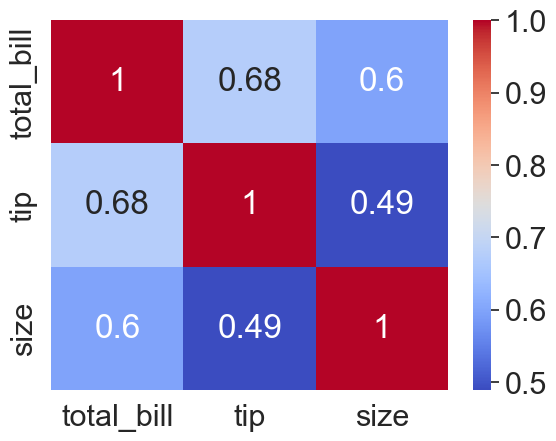

In [42]:
sns.heatmap(tips.corr(),cmap = 'coolwarm',annot = True)

In [45]:
flg = flights.pivot_table(values = 'passengers', index = 'month',columns = 'year')
flg

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


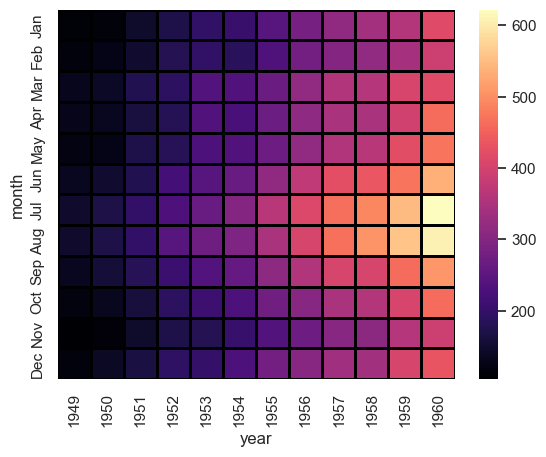

In [52]:
sns.heatmap(flg,cmap = 'magma', linecolor = 'black', linewidth = 2)
sns.set(font_scale = 2)

In [53]:
#clusterMap uses hierarchal clustering 

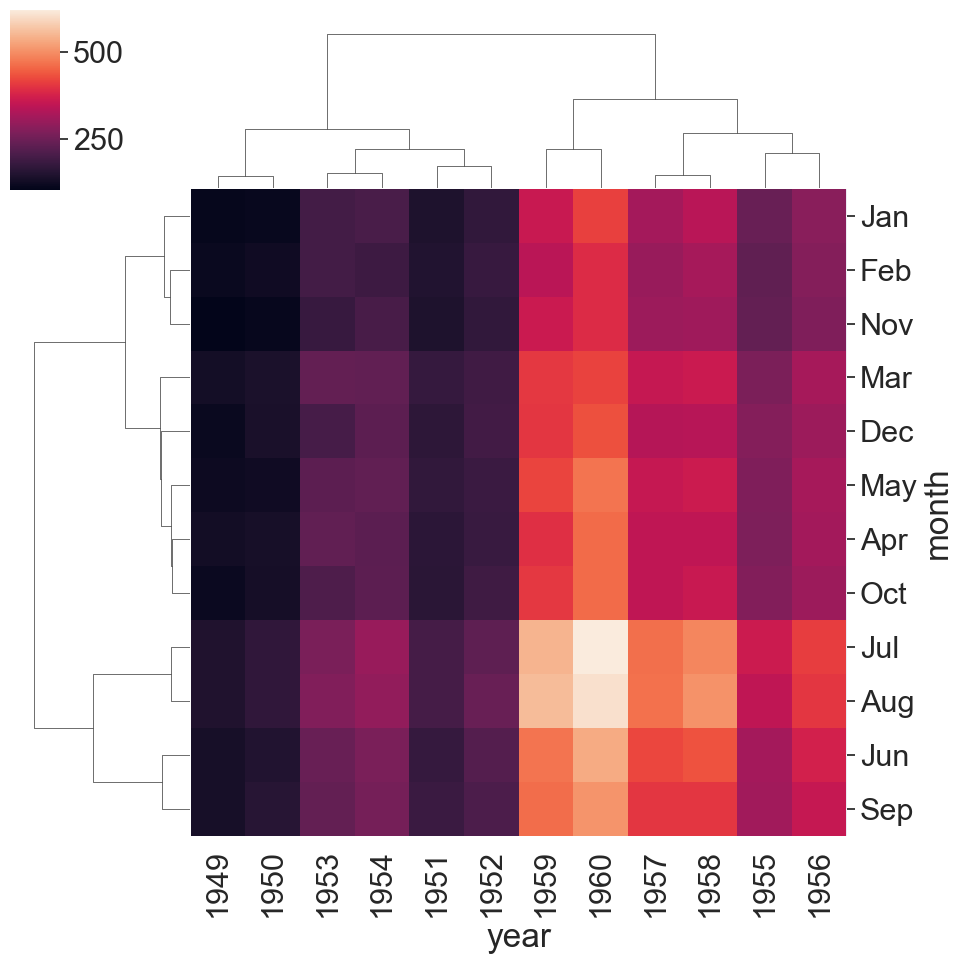

In [54]:
sns.clustermap(flg)

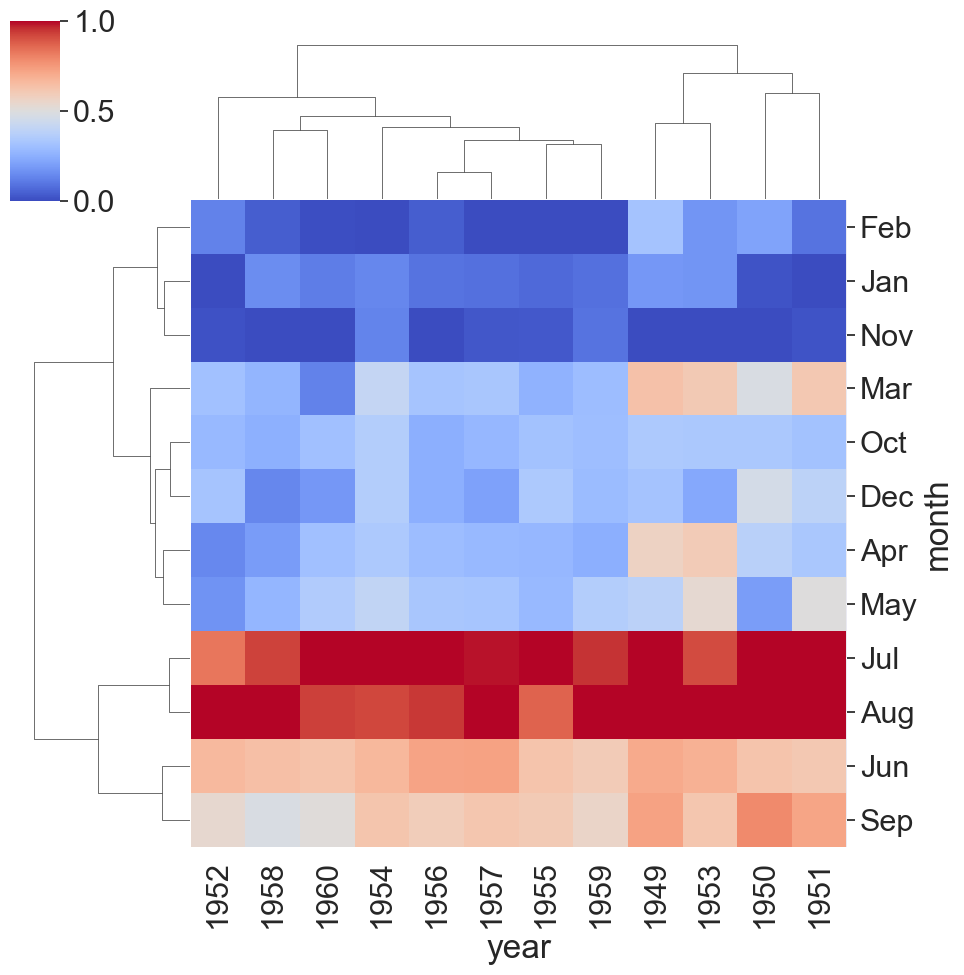

In [55]:
sns.clustermap(flg,cmap = 'coolwarm',standard_scale = 1)

__Grid__

In [56]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

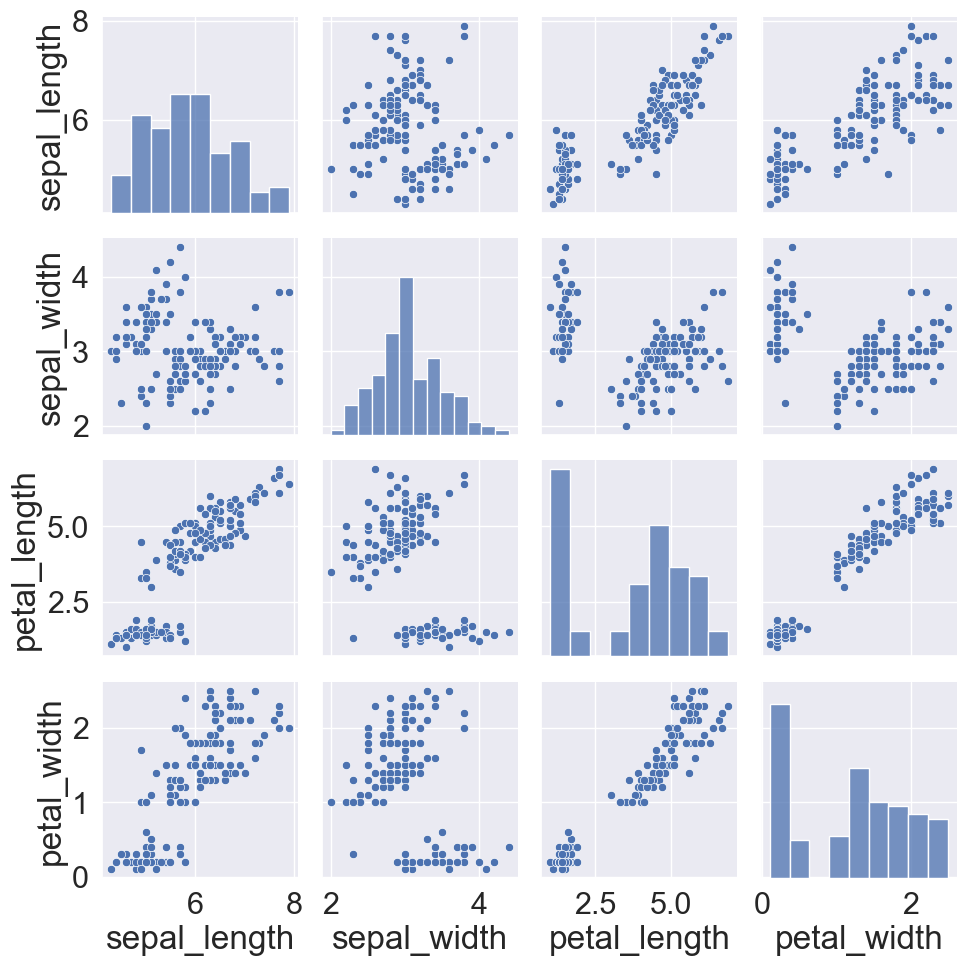

In [59]:
sns.pairplot(iris)

E:\ANACONDA\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
E:\ANACONDA\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
E:

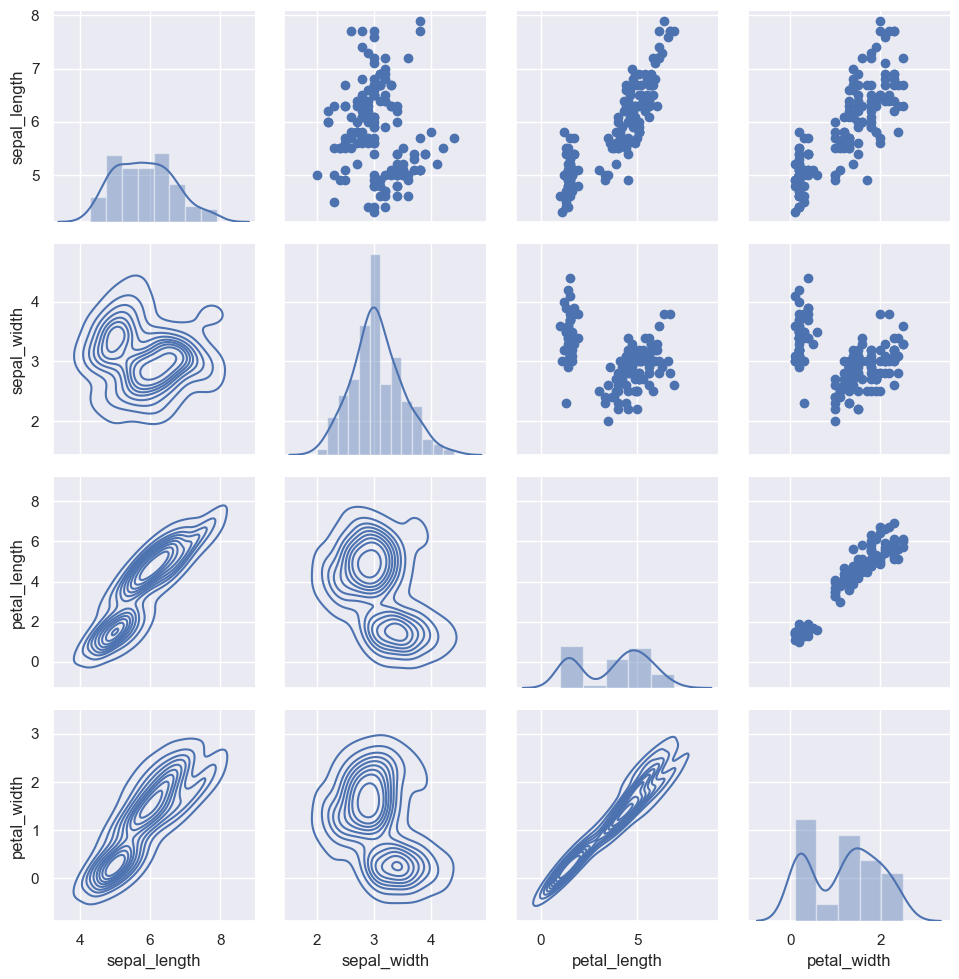

In [66]:
sns.set(font_scale = 1)
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


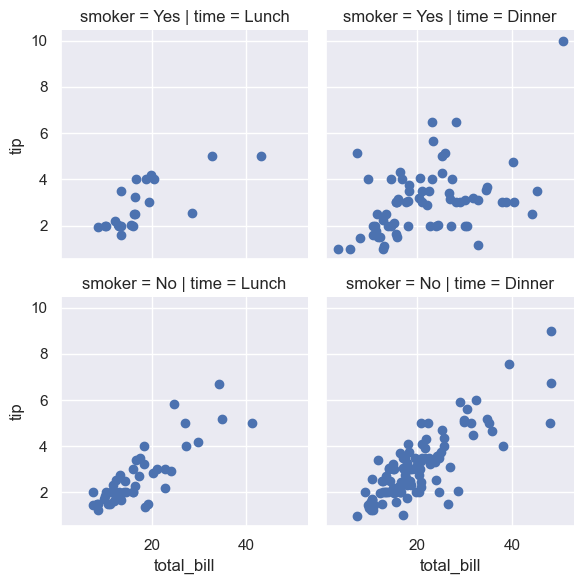

In [69]:
g = sns.FacetGrid(data = tips,col = 'time',row = 'smoker')
g.map(plt.scatter,'total_bill','tip')

__Regression Plots__

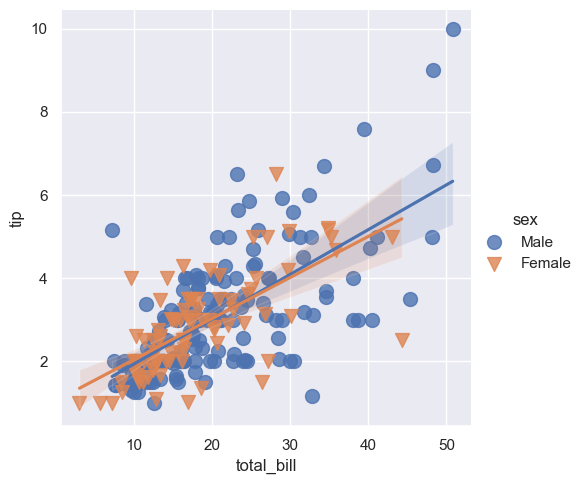

In [72]:
sns.lmplot(x = 'total_bill',y='tip',data= tips,hue = 'sex',markers=['o','v'],
          scatter_kws = {'s':100})

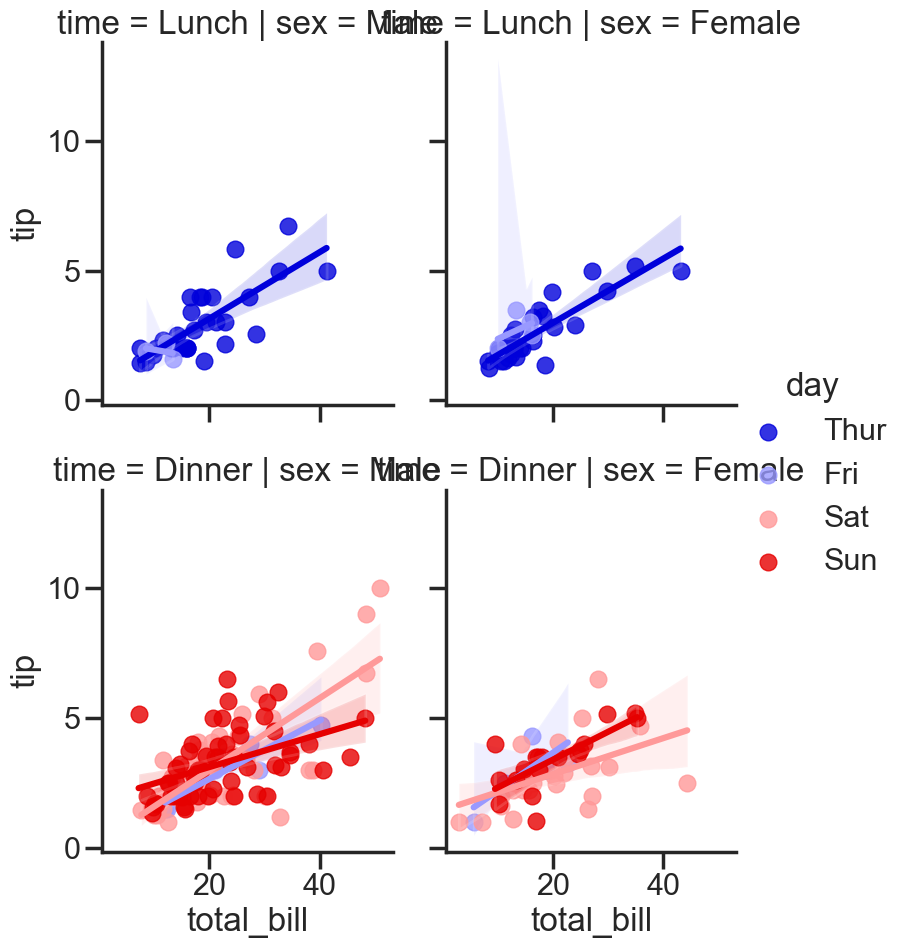

In [82]:
sns.lmplot(x = 'total_bill',y='tip',data= tips,col='sex',row='time',hue='day'
          ,aspect=0.8,palette = 'seismic')

__style and color__

<Axes: xlabel='sex', ylabel='count'>

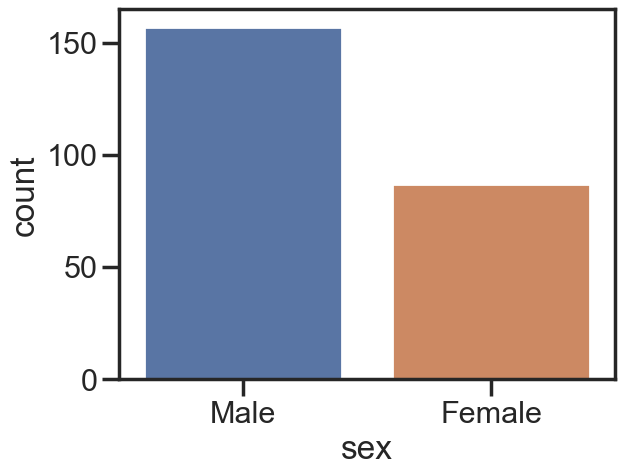

In [81]:
# sns.set_style('ticks')
# plt.figure(figsize=(12,3))
sns.set_context('poster')
sns.countplot(x ='sex',data = tips)
# sns.despine(left=True,bottom = True)

__Exercise__

In [3]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


AttributeError: 'JointGrid' object has no attribute 'annotate'

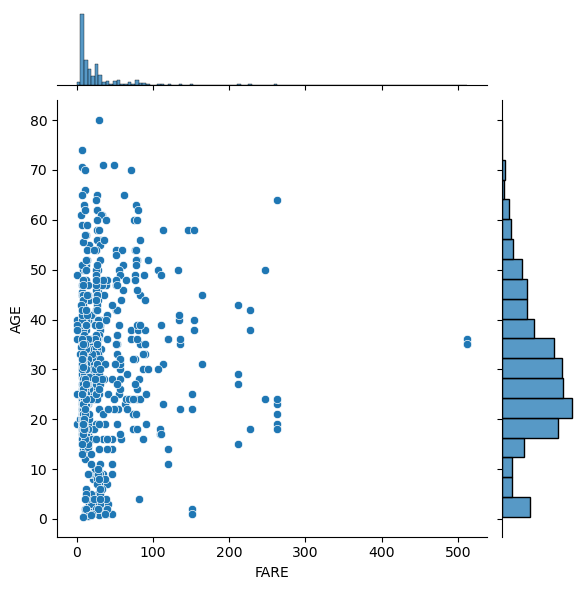

In [9]:
g = sns.JointGrid(data = titanic,x='fare',y='age')
g.set_axis_labels('FARE','AGE')
g.plot(sns.scatterplot,sns.histplot)